
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [188]:
import pandas as pd  # Importing Pandas
import seaborn as sns
import matplotlib.pyplot as plt


In [189]:
towndata = {
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
    "Population": [347949, 975551, 233839, 583056],
}  # Creating dict with lists as
towncol = pd.DataFrame(data=towndata)
towncol


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [190]:
# a)
print(",".join(towncol["Kommun"]))


Malmö,Stockholm,Uppsala,Göteborg


In [191]:
# b)
print(towncol[towncol["Kommun"] == "Göteborg"])


     Kommun  Population
3  Göteborg      583056


In [192]:
# c)
population_sort_largest = towncol.sort_values(by="Population", ascending=False)
population_sort_largest


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [193]:
# d)

population_sort_smallest = towncol.sort_values(
    by="Population",
).head(1)
population_sort_smallest


,Kommun,Population
2,Uppsala,233839


In [194]:
# e)

towncol["Population Precentage"] = round((towncol["Population"] / 10379295) * 100)
towncol


,Kommun,Population,Population Precentage
0,Malmö,347949,3.0
1,Stockholm,975551,9.0
2,Uppsala,233839,2.0
3,Göteborg,583056,6.0


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [195]:
# a)
df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")

df.rename(
    columns={
        "Unnamed: 0": "Rang 2020",
        "Unnamed: 1": "Rang 2019",
        "Unnamed: 2": "Kommun",
        "Unnamed: 3": "Folkmängd 2020",
        "Unnamed: 4": "Folkmängd 2019",
        "Unnamed: 5": "Förändring",
    },
    inplace=True,
)  # rename columns using column dict

# b)
df = df.drop(df.index[0:6])  # drop all rows from 0-6
df.reset_index(
    drop=True, inplace=True
)  # reset index count to start from 0, drop old index count
df["Rang 2019"] = df["Rang 2019"].astype(int)
df["Rang 2020"] = df["Rang 2020"].astype(int)  # Chaining several functions/methods.
df.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402.0,1.483982
1,64,64,Alingsås,41602,41420.0,0.439401
2,123,123,Alvesta,20224,20134.0,0.447005
3,255,255,Aneby,6821,6848.0,-0.394276
4,169,167,Arboga,14039,14087.0,-0.34074


In [196]:
# c) Sort the cities by population from largest to smallest
population_sort_largest = df.sort_values(by="Folkmängd 2020", ascending=False)
population_sort_largest


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073.0,0.151734
57,2,2,Göteborg,583056,579281.0,0.65167
134,3,3,Malmö,347949,344166.0,1.099179
241,4,4,Uppsala,233839,230767.0,1.331213
124,5,5,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794.0,0.393701
5,287,287,Arjeplog,2718,2785.0,-2.405745
29,288,288,Dorotea,2498,2551.0,-2.077617
194,289,289,Sorsele,2442,2489.0,-1.888309


In [197]:
# d) Sort the cities by population smallest 5.
population_small_5_sorted = df.sort_values(
    by="Folkmängd 2020",
).head()
population_small_5_sorted


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408.0,-0.872093
194,289,289,Sorsele,2442,2489.0,-1.888309
29,288,288,Dorotea,2498,2551.0,-2.077617
5,287,287,Arjeplog,2718,2785.0,-2.405745
271,286,286,Åsele,2805,2794.0,0.393701


In [198]:
# e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

total_pop_2019 = round(sum(df["Folkmängd 2019"]))
print(f"Total population year 2019 = {total_pop_2019}")


total_pop_2020 = round(sum(df["Folkmängd 2020"]))
print(f"Total population year 2020 = {total_pop_2020}")


Total population year 2019 = 10327589
Total population year 2020 = 10379295


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 198 to 12
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rang 2020       290 non-null    int32  
 1   Rang 2019       290 non-null    int32  
 2   Kommun          290 non-null    object 
 3   Folkmängd 2020  290 non-null    object 
 4   Folkmängd 2019  290 non-null    float64
 5   Förändring      290 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 13.6+ KB


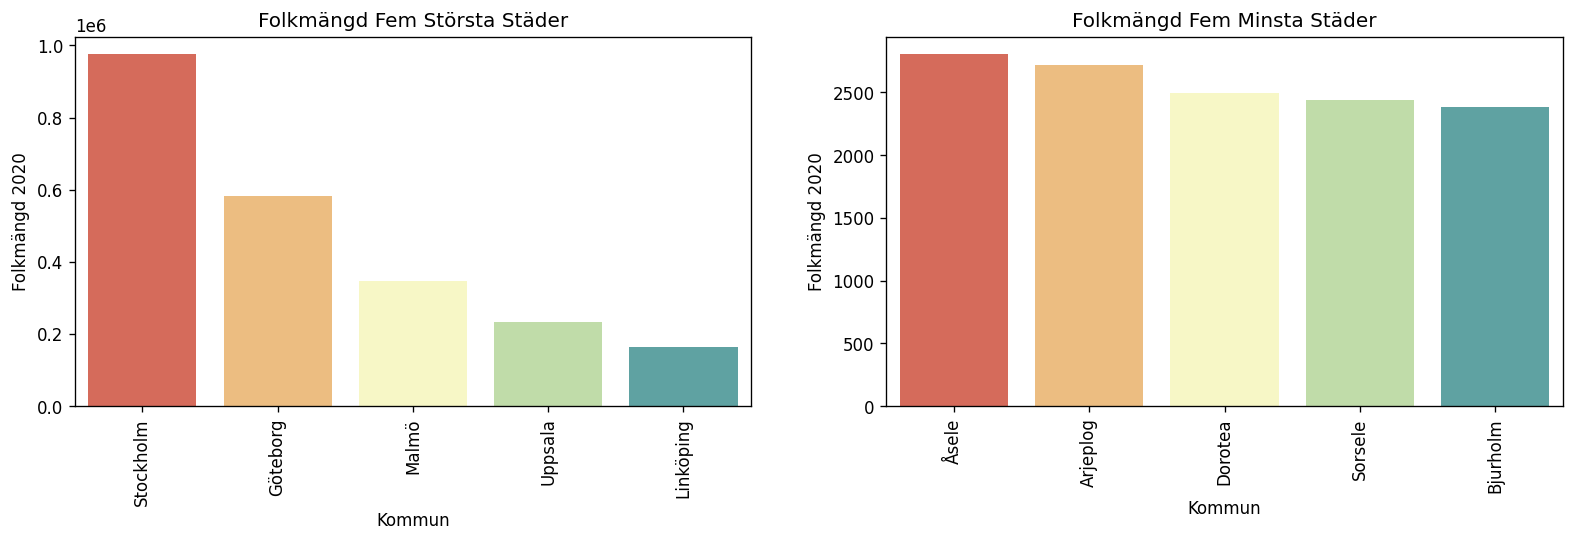

In [199]:
# f) Plot a bar chart for the five largest cities and the five smallest cities. (*)

fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)
titles = ["Folkmängd Fem Största Städer", "Folkmängd Fem Minsta Städer"]
data_frames = (population_sort_largest.head(), population_small_5_sorted[::-1])

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(
        data=data, x="Kommun", y="Folkmängd 2020", palette="Spectral", ax=axes[i]
    )
    axes[i].set(title=title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

population_sort_largest.info()

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [200]:
# a )

df_women = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Kvinnor") # Reding in sheets
df_men = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Män")


def clean_df(df, gender):
    df.rename(
        columns={
            "Unnamed: 0": "Rang 2020",
            "Unnamed: 1": "Rang 2019",
            "Unnamed: 2": "Kommun",
            "Unnamed: 3": "Folkmängd 2020",
            "Unnamed: 4": "Folkmängd 2019",
            "Unnamed: 5": "Förändring",
        },
        inplace=True,
    )  # rename columns using column dict

    df = df.drop(df.index[0:6])  # drop all rows from 0-6
    df.reset_index(
        drop=True, inplace=True
    )  # reset index count to start from 0, drop old index count
    df["Rang 2019"] = df["Rang 2019"].astype(int)  # Chaining several functions/methods.
    df["Rang 2020"] = df["Rang 2020"].astype(int)

    if gender == None: # Check if gender parameter is None. if so it does not add Kön to column
        pass
    else:
        df.insert(6, "Kön", gender)

    return df


df_women = clean_df(df_women, "Kvinna") # Testing solutions ↓
df_men = clean_df(df_men, "Man")
# print(df_women.head())
# print(df_men.head())
df_women.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348.0,1.720094,Kvinna
1,64,64,Alingsås,20900,20774.0,0.606527,Kvinna
2,123,123,Alvesta,9857,9795.0,0.632976,Kvinna
3,255,255,Aneby,3318,3350.0,-0.955224,Kvinna
4,165,164,Arboga,6945,6973.0,-0.401549,Kvinna


In [201]:
# b ) 
def pop_columns(df):
        
    df.pop("Rang 2020") # Removing columns
    df.pop("Rang 2019") 

    return df

pop_columns(df_men)
pop_columns(df_women)

df_merged = pd.concat([df_women, df_men]) # Merge with .concat to get it vertically

df_merged.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348.0,1.720094,Kvinna
1,Alingsås,20900,20774.0,0.606527,Kvinna
2,Alvesta,9857,9795.0,0.632976,Kvinna
3,Aneby,3318,3350.0,-0.955224,Kvinna
4,Arboga,6945,6973.0,-0.401549,Kvinna


In [202]:
# c)

df_total = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")


df_total = clean_df(df_total, None)  # using clean_df function
#Creating function to pop rang2020 and 2019


df_total = pop_columns(df_total)


# Renaming columns
df_total.rename(
    columns={
        "Folkmängd 2020": "Total Pop 2020",
        "Folkmängd 2019": "Total Pop 2019",
        "Förändring": "Total Förändring",
    },
    inplace=True,
)
df_total.head() # Printing out head.

df_total.tail(10)

,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
280,Ödeshög,5338,5337.0,0.018737
281,Örebro,156381,155696.0,0.43996
282,Örkelljunga,10451,10280.0,1.663424
283,Örnsköldsvik,55807,55998.0,-0.341084
284,Östersund,63985,63779.0,0.32299
285,Österåker,46644,45574.0,2.34783
286,Östhammar,22251,22250.0,0.004494
287,Östra Göinge,15017,15007.0,0.066636
288,Överkalix,3289,3315.0,-0.784314
289,Övertorneå,4217,4299.0,-1.90742


In [203]:


#df_all = pd.concat([df_merged, df_total], axis=1) # Using pop columns whils concatinating the DataFrames.
df_all = df_merged.merge(df_total).sort_values(by = "Total Pop 2020", ascending= False, ignore_index= True)

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            580 non-null    object 
 1   Folkmängd 2020    580 non-null    object 
 2   Folkmängd 2019    580 non-null    float64
 3   Förändring        580 non-null    object 
 4   Kön               580 non-null    object 
 5   Total Pop 2020    580 non-null    object 
 6   Total Pop 2019    580 non-null    float64
 7   Total Förändring  580 non-null    object 
dtypes: float64(2), object(6)
memory usage: 36.4+ KB


&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)


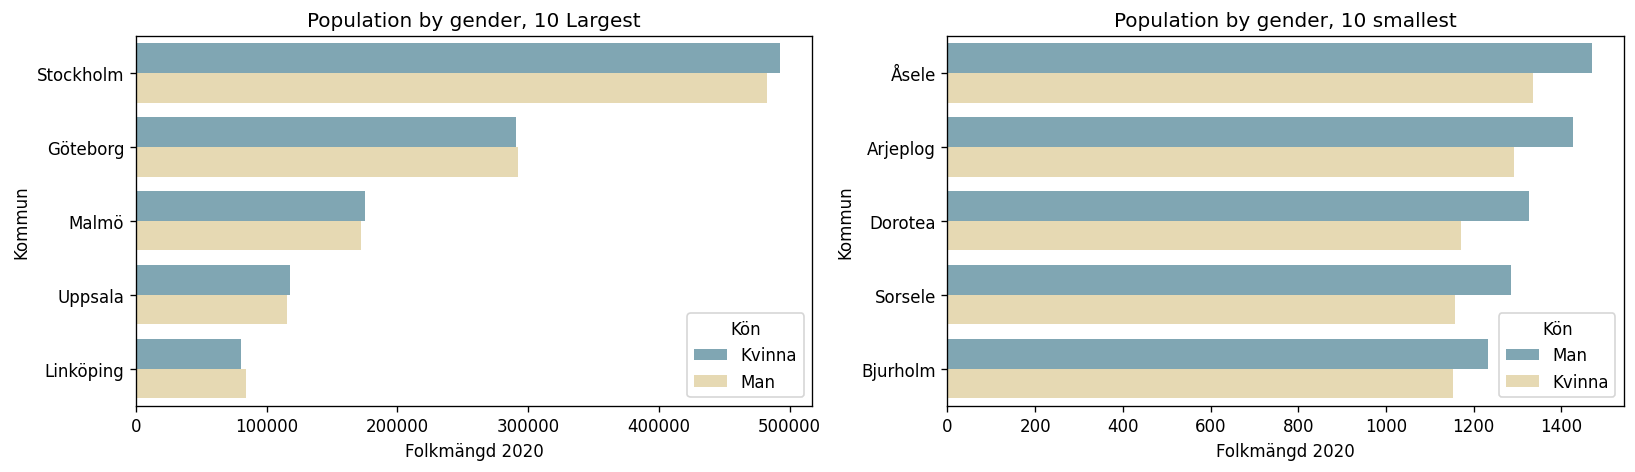

In [204]:
# e)

fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)
titles = ["Population by gender, 10 Largest", "Population by gender, 10 smallest"]
data_frames = (df_all.head(10), df_all.tail(10))

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x="Folkmängd 2020", y="Kommun", hue="Kön", ax=axes[i], palette= "blend:#7AB,#EDA")
    axes[i].set(title=title)


# F

    - Create a pie chart showing the total male and female population in Sweden 2020



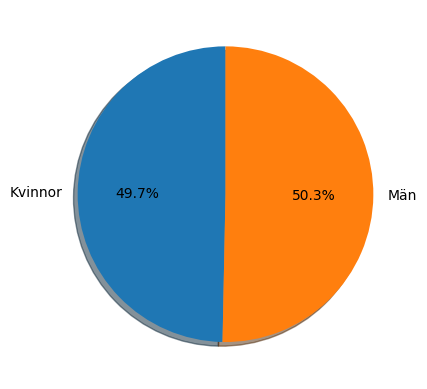

In [205]:
#Code structure from Daniel Nilsson, Changed values in female_pop and male_pop to represent the total value of pop

df_gender_grouped = df_all.groupby(df_all["Kön"])
female_pop = df_gender_grouped.get_group("Kvinna")["Folkmängd 2020"]    # Returns total value of Folkmängd 2020 for all "Kvinna"
male_pop = df_gender_grouped.get_group("Man")["Folkmängd 2020"]
pop_list = [female_pop.sum(), male_pop.sum()]
mylabels = ["Kvinnor", "Män"]


plt.pie(pop_list, startangle=90, labels=mylabels, autopct="%0.1f%%", shadow=True);

In [248]:
df_women_pop = df_all.groupby("Kön").get_group("Kvinna")["Folkmängd 2020"].astype(float)
df_male_pop = df_all.groupby("Kön").get_group("Man")["Folkmängd 2020"].astype(float)

df_women_pop.head(5)
df_male_pop.head(5)


1    482982.0
2    292505.0
4    172538.0
6    115692.0
9     84055.0
Name: Folkmängd 2020, dtype: float64

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---